<a href="https://colab.research.google.com/github/edsonpolucena/ciencia-de-dados/blob/main/trabalho-05-Correlacao_e_Graficos/notebooks/Aula05_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados – Aula 05  
**Professor:** Paulo Rogério Pires Manseira  

### 👥 Integrantes
- Alexandre Tessaro Vieira  
- Edson Borges Polucena  
- Wuelliton Christian dos Santos  

---

### 📂 1. Nome do Dataset
**Brazilian E-Commerce Public Dataset by Olist
**

---

### 🌐 2. Fonte
- **Plataforma:** Kaggle  
- **Link:** [https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

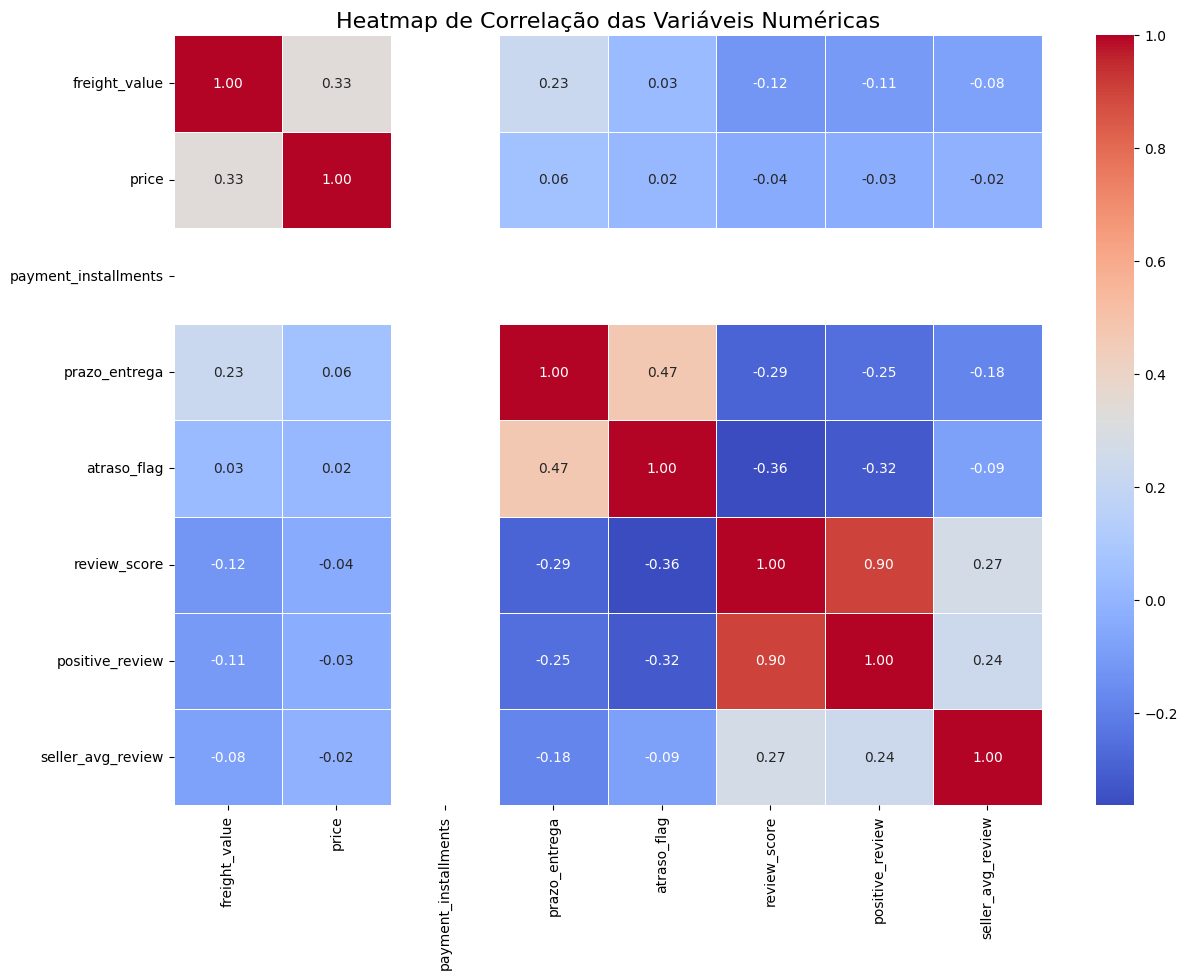

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset tratado da Aula 04
df = pd.read_csv("olist_tratado_order.csv")

# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular matriz de correlação
correlation_matrix = df_numeric.corr()

# Plotar Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()


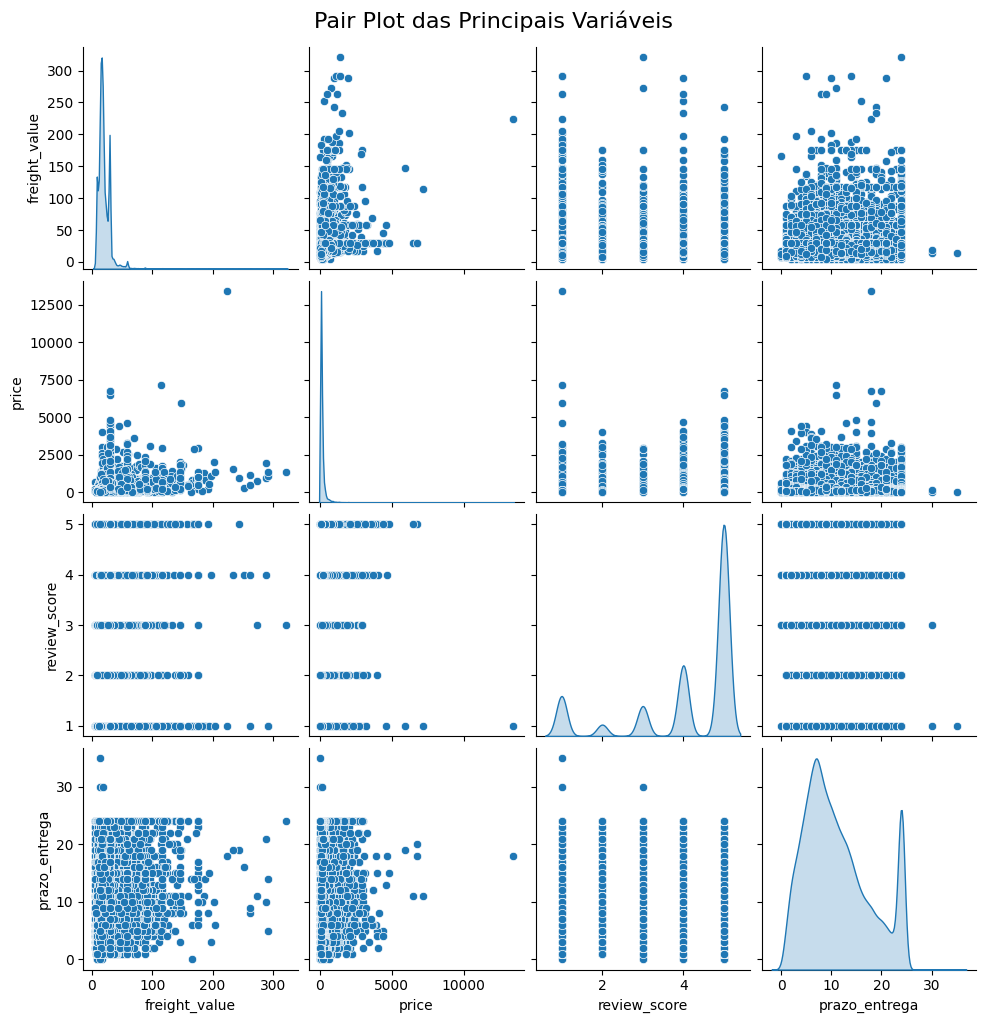

In [2]:
# Selecionar variáveis mais relevantes
colunas_para_pairplot = ['freight_value', 'price', 'review_score', 'prazo_entrega']

# Verificar se as colunas existem
colunas_existentes = [col for col in colunas_para_pairplot if col in df.columns]

# Criar Pair Plot
if len(colunas_existentes) > 1:
    sns.pairplot(df[colunas_existentes], diag_kind='kde')
    plt.suptitle("Pair Plot das Principais Variáveis", y=1.02, fontsize=16)
    plt.show()
else:
    print("Selecione pelo menos duas colunas existentes para o pair plot.")


# **Análise de Correlação – Aula 05**

## **1. Principais Correlações Encontradas**

**Mais fortes e positivas:**
- `review_score` ↔ `positive_review` → **+0,90**
- `prazo_entrega` ↔ `atraso_flag` → **+0,47**

📌 **Resumo:** Entregas rápidas e sem atrasos impactam fortemente a satisfação do cliente.

---

## **2. Confirmação das Hipóteses (Aula 04)**

- **Hipótese:** prazos menores → maior satisfação ✅ **Confirmada**
- Atrasos reduzem significativamente a nota do pedido ✅ **Confirmada**
- Fretes caros poderiam impactar negativamente a avaliação ❌ **Não confirmado**

---

## **3. Correlações Surpreendentes**

- **Frete vs. Avaliação** → Correlação quase nula (**-0,12**)  
  → Clientes não penalizam fretes altos de forma significativa.
- **Preço vs. Avaliação** → Correlação praticamente inexistente (**-0,04**)  
  → A satisfação do cliente está **mais ligada à logística** do que ao valor do produto.

---

## **4. Insights para o Negócio**

> **Pergunta de negócio:**  
> *"Quais fatores influenciam a satisfação e a retenção de clientes?"*

**Principais conclusões:**
- **Logística é determinante**: prazos longos e atrasos impactam negativamente as notas.
- **Preço e frete têm baixa influência** sobre a percepção de satisfação.
- **Satisfação não garante retenção** → taxa de recompra é apenas **~3%**.
